In [43]:
pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12205 sha256=d552a7c12a8c44e9a135cdd05b23f10d016097a68b63e3b89aedff2d6840503b
  Stored in directory: /root/.cache/pip/wheels/e9/57/8a/15b864f4d5dc20cef626e3a015fec88b19df385ef30a8364cc
Successfully built empiricaldist


In [ ]:
# The beteer optionn that I found for upload data in Colab
# You can see: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import drive
drive.mount('/content/drive')

In [112]:
# The problem with encoding has been in the data.
# I left two short but util reads:
# https://kb.iu.edu/d/ahfr
# https://www.w3.org/International/questions/qa-what-is-encoding

import pandas as pd
import seaborn as sns
import numpy as np
import empiricaldist
import scipy

assay_df = pd.read_csv('/content/drive/MyDrive/eda-course/assay.csv', encoding="latin1")
#survey_df = pd.read_csv('/content/drive/MyDrive/eda-course/survey.csv', encoding="latin1")
#header_df = pd.read_csv('/content/drive/MyDrive/eda-course/header.csv', encoding="latin1")
assay_df = assay_df.replace('-', np.nan).rename(columns={"N° SAMPLE ": "SAMPLE"})
assay_df

,BHID,FROM,TO,SAMPLE,Au_ppm,Ag_ppm,Cu_%,Zn_ppm,Mo_ppm,As_ppm,Sb_ppm,Pb_ppm
0,DEEP-001,0.00,1.95,SKILL-000001,0.04,1.05,0.008,15.8,NaN,NaN,NaN,NaN
1,DEEP-001,1.95,3.55,SKILL-000002,0.078,2.55,0.004,14.45,NaN,NaN,NaN,NaN
2,DEEP-001,3.55,5.55,SKILL-000003,0.039,2.35,0.009,16.6,NaN,NaN,NaN,NaN
3,DEEP-001,5.55,7.55,SKILL-000004,0.043,2.55,0.008,14.75,NaN,NaN,NaN,NaN
4,DEEP-001,7.55,9.55,SKILL-000005,0.073,9,0.002,8.05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20978,DEEP-058A,226.30,227.30,25558,0.028,NaN,0.0931,NaN,38,NaN,NaN,NaN
20979,DEEP-058A,227.30,228.30,25559,0.015,NaN,0.0385,NaN,28,NaN,NaN,NaN
20980,DEEP-058A,228.30,230.00,25560,0.062,NaN,0.1076,NaN,31,NaN,NaN,NaN
20981,DEEP-058A,230.00,231.90,25561,0.029,NaN,0.0157,NaN,34,NaN,NaN,NaN


In [113]:
# Clase 03
assay_df = (
    assay_df
    .astype(
        {
            'Au_ppm': float,
            'Ag_ppm': float,
            'Cu_%': float,
            'Zn_ppm': float,
            'Mo_ppm': float,
            'As_ppm': float,
            'Sb_ppm': float,
            'Pb_ppm': float,
            'BHID': 'category',
            'SAMPLE': 'category'
        }
    )
)

In [25]:
assay_df.describe()

,FROM,TO,Au_ppm,Ag_ppm,Cu_%,Zn_ppm,Mo_ppm,As_ppm,Sb_ppm,Pb_ppm
count,20983.000000,20983.000000,20930.000000,3315.000000,20930.000000,3315.000000,19712.000000,2338.000000,2338.000000,2338.000000
mean,454.481972,456.276537,0.144721,1.507635,0.197286,434.998869,31.703658,91.480539,7.103293,54.523952
std,243.273049,242.859609,0.218434,7.952575,0.184529,783.979625,38.172687,268.354073,35.009686,190.347493
min,0.000000,1.400000,0.000000,0.000000,0.000000,5.100000,0.000000,1.500000,2.500000,1.000000
25%,259.850000,261.600000,0.038000,0.400000,0.046000,44.775000,12.000000,9.000000,2.500000,17.000000
50%,425.500000,427.000000,0.099000,0.800000,0.168000,140.000000,23.000000,25.000000,2.500000,26.000000
75%,627.000000,628.450000,0.195000,1.600000,0.294000,464.875000,41.000000,72.000000,2.500000,45.000000
max,1087.900000,1089.100000,16.690000,432.000000,4.630000,10000.000000,1973.000000,6982.000000,1383.000000,5589.000000


## ¿Qué preguntas podemos hacernos?

* ¿Se pude encontrar un patrón para el Au?
* ¿Se puede establecer una ley promedio del modelo?
* ¿Puedo entender la forma del modelo?
* ¿Puedo entender la variabilidad de las leyes?

## Validación de datos

### ¿Qué tipo de dato son las variables del conjunto de datos?

In [26]:
assay_df.dtypes

BHID      category
FROM       float64
TO         float64
SAMPLE    category
Au_ppm     float64
Ag_ppm     float64
Cu_%       float64
Zn_ppm     float64
Mo_ppm     float64
As_ppm     float64
Sb_ppm     float64
Pb_ppm     float64
dtype: object

### ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [27]:
assay_df.dtypes.value_counts()

float64     10
category     1
category     1
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [ ]:
assay_df.shape

(20983, 12)

### ¿Existen valores nulos explicitos en el conjunto de datos?

In [ ]:
assay_df.isnull().any()

BHID          False
FROM          False
TO            False
N° SAMPLE      True
Au_ppm         True
Ag_ppm         True
Cu_%           True
Zn_ppm         True
Mo_ppm         True
As_ppm         True
Sb_ppm         True
Pb_ppm         True
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [ ]:
assay_df.isnull().sum().sort_values(ascending=True)

BHID              0
FROM              0
TO                0
Au_ppm           53
Cu_%             53
N° SAMPLE       232
Mo_ppm         1271
Ag_ppm        17668
Zn_ppm        17668
As_ppm        18645
Sb_ppm        18645
Pb_ppm        18645
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
assay_df.isnull().sum().sum()

92880

### ¿Cuál es la proporción de valores nulos por cada variable?

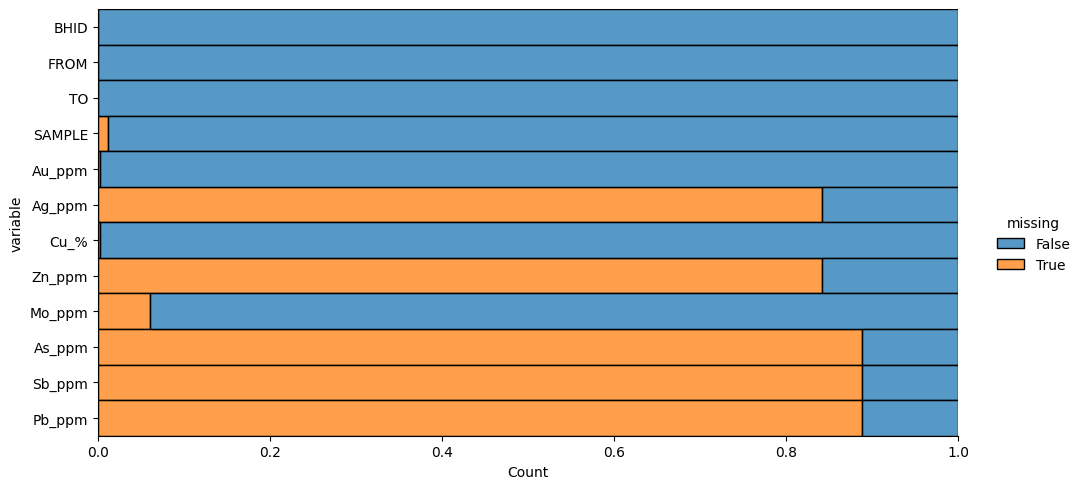

In [28]:
(
    assay_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<Axes: >

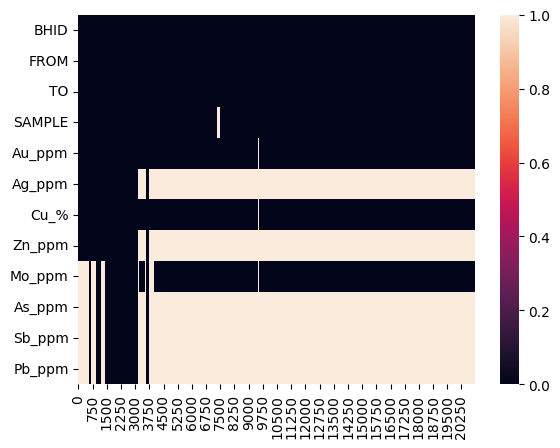

In [29]:
(
    assay_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

In [ ]:
#FIN DE CLASE 02

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?


In [ ]:
assay_df.dropna()

,BHID,FROM,TO,N° SAMPLE,Au_ppm,Ag_ppm,Cu_%,Zn_ppm,Mo_ppm,As_ppm,Sb_ppm,Pb_ppm
541,DEEP-004,73.8,75.8,SKILL - 001200,0.082,1.6,0.111,2850,62,163,2.5,83
542,DEEP-004,75.8,77.8,SKILL - 001201,0.059,0.6,0.081,4950,71,37,2.5,63
543,DEEP-004,77.8,79.8,SKILL - 001202,0.060,1.0,0.077,2280,65,105,2.5,42
544,DEEP-004,79.8,81.8,SKILL - 001203,0.073,1.9,0.117,3280,42,173,7,53
545,DEEP-004,81.8,83.8,SKILL - 001204,0.064,2.3,0.189,1790,77,254,5,71
...,...,...,...,...,...,...,...,...,...,...,...,...
3719,DEEP-019A,539.8,542.6,SKILL-002965,0.042,0.1,0.016,34.3,25,1.5,6,18
3720,DEEP-019A,542.6,545.4,SKILL-002966,0.023,0.2,0.016,60.3,11,1.5,2.5,16
3721,DEEP-019A,545.4,548.2,SKILL-002967,0.012,0.1,0.029,102,8,1.5,2.5,13
3722,DEEP-019A,548.2,551.0,SKILL-002968,0.009,0.1,0.008,81.5,3,1.5,2.5,11


##  Conteos y Proporciones

### Todas las variables

In [30]:
assay_df.describe(include='all')

,BHID,FROM,TO,SAMPLE,Au_ppm,Ag_ppm,Cu_%,Zn_ppm,Mo_ppm,As_ppm,Sb_ppm,Pb_ppm
count,20983,20983.000000,20983.000000,20751,20930.000000,3315.000000,20930.000000,3315.000000,19712.000000,2338.000000,2338.000000,2338.000000
unique,70,NaN,NaN,20750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,DEEP-048,NaN,NaN,TSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,668,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,454.481972,456.276537,NaN,0.144721,1.507635,0.197286,434.998869,31.703658,91.480539,7.103293,54.523952
std,NaN,243.273049,242.859609,NaN,0.218434,7.952575,0.184529,783.979625,38.172687,268.354073,35.009686,190.347493
min,NaN,0.000000,1.400000,NaN,0.000000,0.000000,0.000000,5.100000,0.000000,1.500000,2.500000,1.000000
25%,NaN,259.850000,261.600000,NaN,0.038000,0.400000,0.046000,44.775000,12.000000,9.000000,2.500000,17.000000
50%,NaN,425.500000,427.000000,NaN,0.099000,0.800000,0.168000,140.000000,23.000000,25.000000,2.500000,26.000000
75%,NaN,627.000000,628.450000,NaN,0.195000,1.600000,0.294000,464.875000,41.000000,72.000000,2.500000,45.000000


### Sólo numéricas

In [31]:
assay_df.describe(include=np.number)

,FROM,TO,Au_ppm,Ag_ppm,Cu_%,Zn_ppm,Mo_ppm,As_ppm,Sb_ppm,Pb_ppm
count,20983.000000,20983.000000,20930.000000,3315.000000,20930.000000,3315.000000,19712.000000,2338.000000,2338.000000,2338.000000
mean,454.481972,456.276537,0.144721,1.507635,0.197286,434.998869,31.703658,91.480539,7.103293,54.523952
std,243.273049,242.859609,0.218434,7.952575,0.184529,783.979625,38.172687,268.354073,35.009686,190.347493
min,0.000000,1.400000,0.000000,0.000000,0.000000,5.100000,0.000000,1.500000,2.500000,1.000000
25%,259.850000,261.600000,0.038000,0.400000,0.046000,44.775000,12.000000,9.000000,2.500000,17.000000
50%,425.500000,427.000000,0.099000,0.800000,0.168000,140.000000,23.000000,25.000000,2.500000,26.000000
75%,627.000000,628.450000,0.195000,1.600000,0.294000,464.875000,41.000000,72.000000,2.500000,45.000000
max,1087.900000,1089.100000,16.690000,432.000000,4.630000,10000.000000,1973.000000,6982.000000,1383.000000,5589.000000


### Sólo categóricas

In [33]:
assay_df.describe(include='category')

,BHID,SAMPLE
count,20983,20751
unique,70,20750
top,DEEP-048,TSR
freq,668,2


## Visualización de conteos

### Pandas

In [ ]:
(
    assay_df
    .Au_ppm
    .value_counts()
    .plot(
        kind='bar'
    )
)

In [34]:
(
    assay_df
    .BHID
    .value_counts()
)

BHID
DEEP-048     668
DEEP-033     656
DEEP-029     653
DEEP-036     648
DEEP-040     630
            ... 
DEEP-023       1
DEEP-020       1
DEEP-019       1
DEEP-018A      1
DEEP-013       1
Name: count, Length: 70, dtype: int64

### Seaborn

In [ ]:
sns.catplot(data=assay_df,
            x='BHID',
            kind='count')

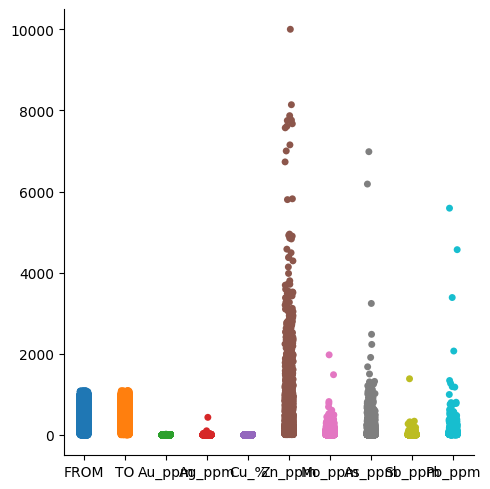

In [36]:
sns.catplot(data=assay_df)

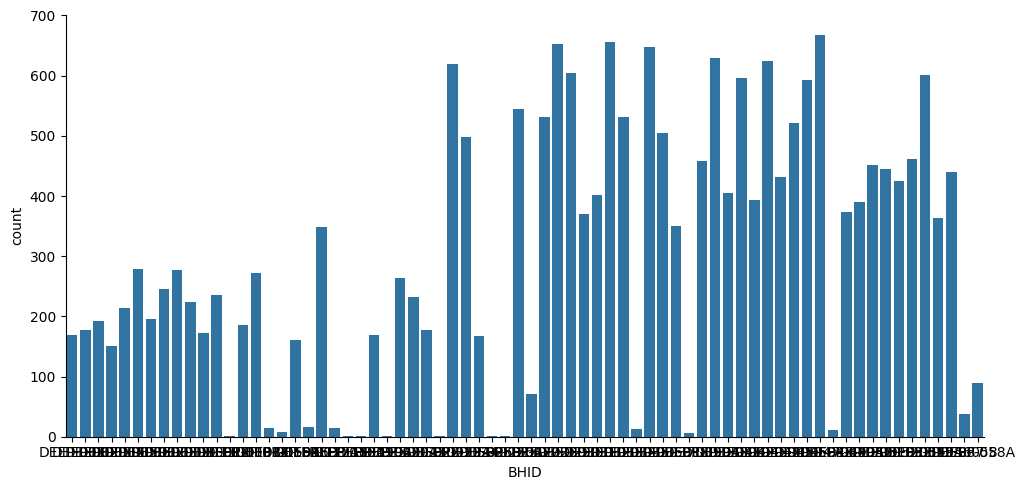

In [51]:
sns.catplot(
    data=assay_df,
    x='BHID',
    kind='count',
    aspect=2
)

### ¿Y las proporciones?

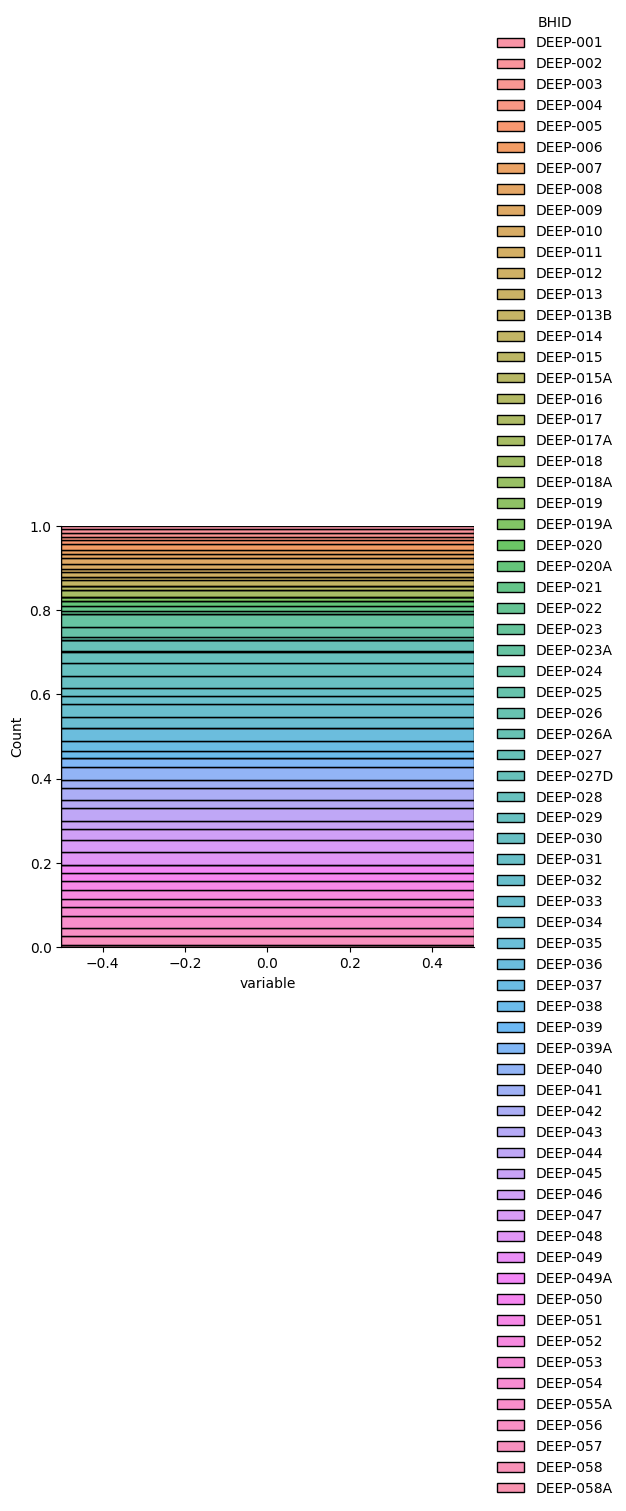

In [4]:
assay_df.insert(0, "variable", 0)
(
    assay_df
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable',
                hue='BHID',
                multiple='fill'
            )
        )
    )
)

## Medidas de tendencia central

### Media o promedio

In [ ]:
assay_df.Au_ppm.mean()

0.14472133301481127

In [ ]:
np.mean(assay_df.Au_ppm)

0.14472133301481127

### Mediana

In [65]:
assay_df.Au_ppm.median()
assay_df.median(numeric_only=True)

FROM      425.500
TO        427.000
Au_ppm      0.099
Ag_ppm      0.800
Cu_%        0.168
Zn_ppm    140.000
Mo_ppm     23.000
As_ppm     25.000
Sb_ppm      2.500
Pb_ppm     26.000
dtype: float64

### Moda

In [ ]:
assay_df.mode()

,variable,BHID,FROM,TO,N° SAMPLE,Au_ppm,Ag_ppm,Cu_%,Zn_ppm,Mo_ppm,As_ppm,Sb_ppm,Pb_ppm
0,0.0,DEEP-048,0.0,344.0,TSR,0.003,0.1,0.002,132.0,2.5,1.5,2.5,16.0
1,NaN,NaN,NaN,345.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
assay_df.describe(include=object)

,BHID,N° SAMPLE
count,20983,20751
unique,70,20750
top,DEEP-048,TSR
freq,668,2


## Medidas de dispersión

### Valor máximo de las variables

In [ ]:
assay_df.max(numeric_only=True)

variable        0.00
FROM         1087.90
TO           1089.10
Au_ppm         16.69
Ag_ppm        432.00
Cu_%            4.63
Zn_ppm      10000.00
Mo_ppm       1973.00
As_ppm       6982.00
Sb_ppm       1383.00
Pb_ppm       5589.00
dtype: float64

### Valor mínimo de las variables

In [ ]:
assay_df.min(numeric_only=True)

variable    0.0
FROM        0.0
TO          1.4
Au_ppm      0.0
Ag_ppm      0.0
Cu_%        0.0
Zn_ppm      5.1
Mo_ppm      0.0
As_ppm      1.5
Sb_ppm      2.5
Pb_ppm      1.0
dtype: float64

### Rango

In [ ]:
assay_df.max(numeric_only=True) - assay_df.min(numeric_only=True)

variable       0.00
FROM        1087.90
TO          1087.70
Au_ppm        16.69
Ag_ppm       432.00
Cu_%           4.63
Zn_ppm      9994.90
Mo_ppm      1973.00
As_ppm      6980.50
Sb_ppm      1380.50
Pb_ppm      5588.00
dtype: float64

### Desviación Estándar

In [ ]:
assay_df.std(numeric_only=True)

variable      0.000000
FROM        243.273049
TO          242.859609
Au_ppm        0.218434
Ag_ppm        7.952575
Cu_%          0.184529
Zn_ppm      783.979625
Mo_ppm       38.172687
As_ppm      268.354073
Sb_ppm       35.009686
Pb_ppm      190.347493
dtype: float64

In [ ]:
assay_df.mean(numeric_only=True)

variable      0.000000
FROM        454.481972
TO          456.276537
Au_ppm        0.144721
Ag_ppm        1.507635
Cu_%          0.197286
Zn_ppm      434.998869
Mo_ppm       31.703658
As_ppm       91.480539
Sb_ppm        7.103293
Pb_ppm       54.523952
dtype: float64

### Rango Intercuartílico

In [ ]:
assay_df.quantile(0.25, numeric_only=True)

variable      0.000
FROM        259.850
TO          261.600
Au_ppm        0.038
Ag_ppm        0.400
Cu_%          0.046
Zn_ppm       44.775
Mo_ppm       12.000
As_ppm        9.000
Sb_ppm        2.500
Pb_ppm       17.000
Name: 0.25, dtype: float64

In [ ]:
assay_df.quantile(0.75, numeric_only=True) - assay_df.quantile(0.25, numeric_only=True)

variable      0.000
FROM        367.150
TO          366.850
Au_ppm        0.157
Ag_ppm        1.200
Cu_%          0.248
Zn_ppm      420.100
Mo_ppm       29.000
As_ppm       63.000
Sb_ppm        0.000
Pb_ppm       28.000
dtype: float64

In [ ]:
(
    assay_df.quantile(q=[0.25, 0.5, 0.75], numeric_only=True)
    .transpose()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

,0.25,0.5,0.75,iqr
variable,0.000,0.000,0.000,0.000
FROM,259.850,425.500,627.000,367.150
TO,261.600,427.000,628.450,366.850
Au_ppm,0.038,0.099,0.195,0.157
Ag_ppm,0.400,0.800,1.600,1.200
Cu_%,0.046,0.168,0.294,0.248
Zn_ppm,44.775,140.000,464.875,420.100
Mo_ppm,12.000,23.000,41.000,29.000
As_ppm,9.000,25.000,72.000,63.000
Sb_ppm,2.500,2.500,2.500,0.000


## Distribuciones

### Histograma

<Axes: xlabel='Au_ppm', ylabel='Count'>

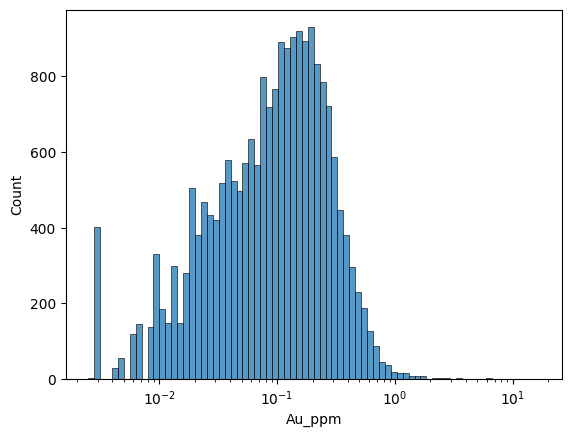

In [73]:
sns.histplot(
    data=assay_df,
    x='Au_ppm',
    log_scale=True,
    binwidth=0.05
)

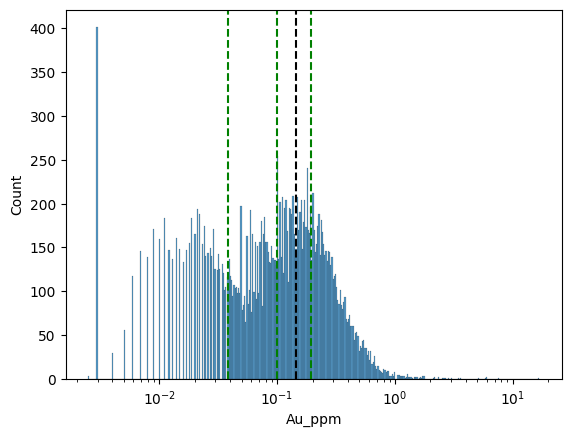

In [77]:
plot = sns.histplot(
    data=assay_df,
    x='Au_ppm',
    binwidth=0.01,
    log_scale=True
)

plot.axvline(
    x=assay_df.Au_ppm.quantile(0.5),
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plot.axvline(
    x=assay_df.Au_ppm.quantile(0.25),
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plot.axvline(
    x=assay_df.Au_ppm.quantile(0.75),
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plot.axvline(
    x=assay_df.Au_ppm.mean(),
    color='black',
    linestyle='dashed',
    linewidth=1.5
)

### Boxplot

<Axes: xlabel='Au_ppm'>

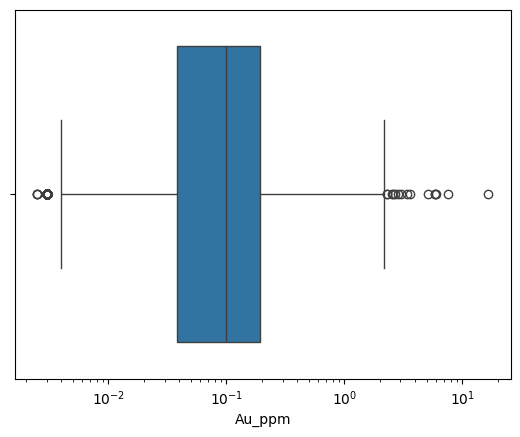

In [18]:
sns.boxplot(x=assay_df.Au_ppm, log_scale=True)

### Limitaciones

In [28]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [76]:
freedman_diaconis_bindwidth(assay_df.Au_ppm)

0.011384320692963482

## Distribuciones: PMFs, CDFs y PDFs

### Función de Probabilidad de Masa (PMF)

#### Usando `seaborn`


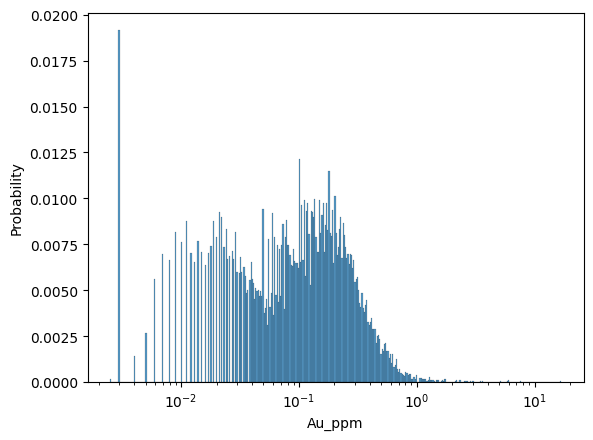

In [96]:
plt = sns.histplot(
    data=assay_df,
    x='Au_ppm',
    binwidth=0.01,
    log_scale=True,
    stat='probability'
)

#### Usando `empiricaldist`

In [47]:
pmf_au = empiricaldist.Pmf.from_seq(
    assay_df.Au_ppm
)

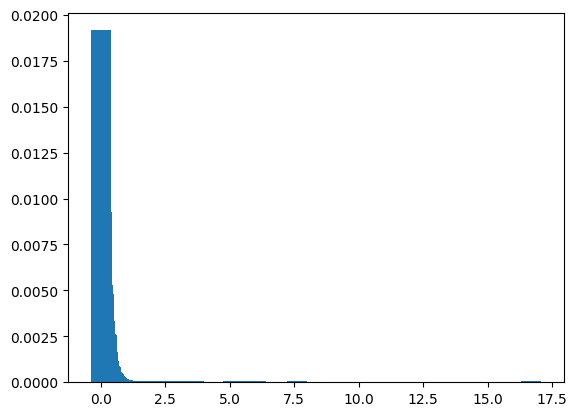

In [50]:
pmf_au.bar()

In [82]:
pmf_au(assay_df.Au_ppm.min())

4.777830864787386e-05

### Función Empírica de Probabilidad Acumulada (ECDF)

#### Usando `seaborn`

<Axes: xlabel='Au_ppm', ylabel='Proportion'>

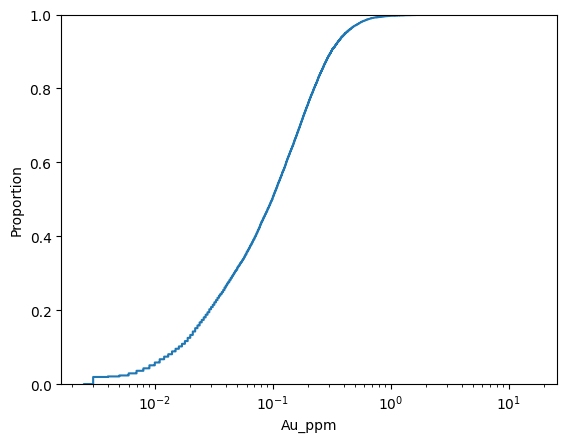

In [85]:
sns.ecdfplot(
    data=assay_df,
    x='Au_ppm',
    log_scale=True
)

#### Usando `empiricaldist`

In [115]:
cdf_au = empiricaldist.Cdf.from_seq(
    assay_df.Au_ppm,
    normalize=True
)

0.4 0.944338270425227


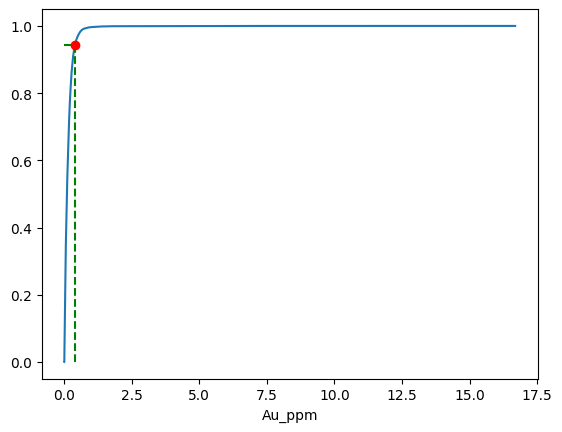

In [116]:
plt = cdf_au.plot()

q = 0.4 # Ley de Oro
p = cdf_au.forward(q)

print(q, p)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plt.hlines(
    y=p,
    xmin=0,
    xmax=q,
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plt.plot(q, p, 'ro')

[0.038 0.195]


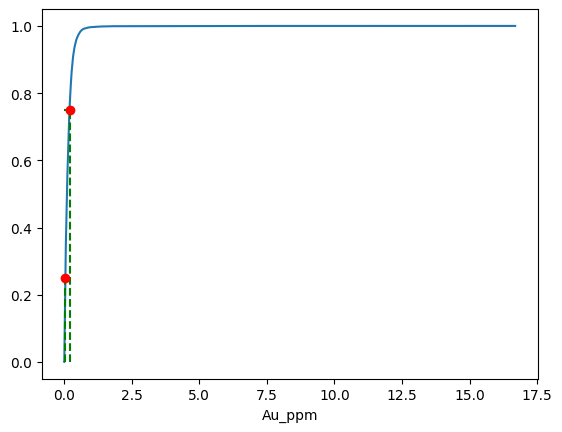

In [125]:
plt = cdf_au.plot()

p_1 = 0.25
p_2 = 0.75

ps = (0.25, 0.75)
qs = cdf_au.inverse(ps)

print(qs)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plt.hlines(
    y=ps,
    xmin=0,
    xmax=qs,
    color='green',
    linestyle='dashed',
    linewidth=1.5
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

### Comparando distribuciones

### Funciones de Densidad de Probabilidad (PDF)

<Axes: xlabel='Au_ppm', ylabel='Density'>

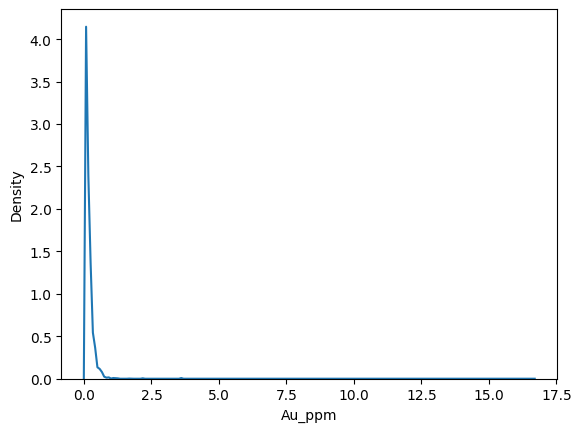

In [123]:
sns.kdeplot(
    data=assay_df,
    x='Au_ppm',
    bw_method=0.01
)

In [107]:
stats = assay_df.Au_ppm.describe()
stats

count    20930.000000
mean         0.144721
std          0.218434
min          0.000000
25%          0.038000
50%          0.099000
75%          0.195000
max         16.690000
Name: Au_ppm, dtype: float64

<Axes: xlabel='Au_ppm'>

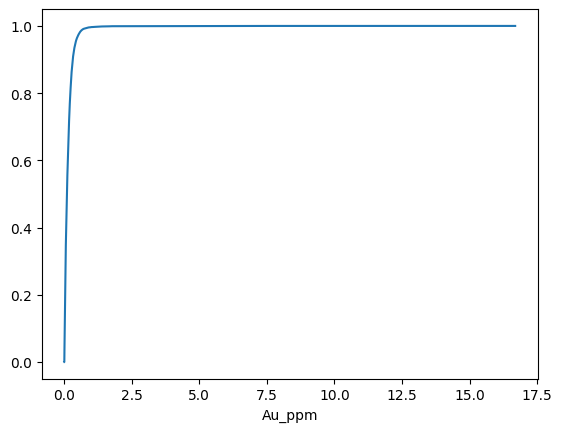

In [128]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')
empiricaldist.Cdf.from_seq(
    assay_df.Au_ppm,
    normalize=True
).plot()

## Relaciones entre variables

<Axes: xlabel='Au_ppm', ylabel='Ag_ppm'>

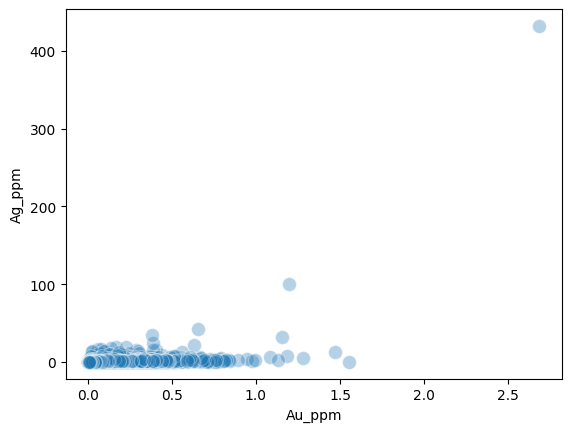

In [130]:
sns.scatterplot(
    data=assay_df,
    x='Au_ppm',
    y='Ag_ppm',
    alpha=1/3,
    s=100
)